# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests, os
import time
import json
from twython import Twython
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy

CONSUMER_KEY = 'Nqb5iNBevjn4DrlTXcAKJsvIU'
CONSUMER_SECRET = 'Lk9AOL02HneB8auPU1tZQcG86xpWpKhafnxdArDlnkinYhKcl1'
ACCESS_TOKEN = '996827309033259009-nNdbMnKEg4nrdNFJwowAXVKM7HbM8uX'
ACCESS_SECRET = '7itURu2ZAMLTXuCCvfOLrfJlCy8cdeIXKCm5YTeAK7Wes'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True,)

In [9]:
start = time.time()

with open('json_file.txt', mode = 'w') as file:
    for one_id in twitter_archive.tweet_id :
        try:
            tweet = api.get_status(one_id,tweet_mode='extended')
            json_txt = tweet._json
            json.dump(json_txt,file)
            file.write('\n')
        except :
            continue
            
end = time.time()
print(round((end-start)/60))

Rate limit reached. Sleeping for: 179
Rate limit reached. Sleeping for: 473


30


In [10]:
tweets_list = []        
with open('json_file.txt','r') as file:
    for line in file :
        tweets_dict = {}
        json_line = json.loads(line)
        
        tweets_dict['tweet_id'] = json_line['id']
        tweets_dict['retweet_count'] = json_line['retweet_count']
        tweets_dict['favorite_count'] = json_line['favorite_count']
        
        tweets_list.append(tweets_dict)

In [11]:
twitter_api = pd.DataFrame(tweets_list)
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [12]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7077,34138
1,892177421306343426,5344,29618
2,891815181378084864,3515,22300
3,891689557279858688,7286,37312
4,891327558926688256,7820,35651


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
Twitter Archive Dataset

* Keep only original ratings (no retweets) that have images and delete retweets.

* There are several records that contains a value != 10 in the `rating_denominator` column that needs to be removed.

* Rename some of the columns with more clear and appropriate names, which are `timestamp`, `text`, `rating_numerator`, `name`.

* Keep only the string in the `Source` column and remove the HTML tag.

* Remove hyperlinks in the `text` column to keep only the string.

* Fix the data type of the `tweet_id` from int into string in the three datasets.

* Delete unusfull column that does not give any usful information of the data.

* Remove tweets that are missing images after the merging.

### Tidiness issues
Twitter Archive Dataset
* Merge `doggo`, `floofer`, `pupper` and `puppo` columns into one `dog_stage` column.

Twitter API Dataset
* Merge `twitter_api` dataset into `twitter_archive` dataset as the tweets `retweet_count` and `favorite_count` should belong the the `twitter_archive` dataset.

Image Predictions Dataset
* Merge `image_predictions` dataset into `twitter_archive` dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

### Issue #1

#### Define
Keep only original ratings (no retweets) that have images and delete retweets.

#### Code

In [14]:
# select only the records that does not include any retweet information, which are the original tweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == True]

#### Test

In [15]:
# all retweet columns should be null
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2

#### Define
There are several records that contains a value != 10 in the `rating_denominator` column that needs to be removed.

#### Code

In [16]:
# select only the records that contains the value 10 in the rating_denominator column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

#### Test

In [17]:
# the value should only be zero
twitter_archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

### Issue #3

#### Define
Merge `doggo`, `floofer`, `pupper` and `puppo` columns into one `dog_stage` column.

#### Code

In [18]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.pupper + twitter_archive_clean.puppo + twitter_archive_clean.floofer


In [19]:
# check the dog stages that we have
twitter_archive_clean.dog_stage.value_counts()

NoneNoneNoneNone        1809
NonepupperNoneNone       224
doggoNoneNoneNone         75
NoneNonepuppoNone         24
doggopupperNoneNone       10
NoneNoneNonefloofer        9
doggoNonepuppoNone         1
doggoNoneNonefloofer       1
Name: dog_stage, dtype: int64

In [20]:
# define a function to check the dog stage
def dog_stages(dataset):
    if dataset.dog_stage.count('None') == 2:
        return 'multiple'
    elif dataset.dog_stage.count('doggo') == 1:
        return 'doggo'
    elif dataset.dog_stage.count('pupper') == 1:
        return 'pupper'
    elif dataset.dog_stage.count('puppo') == 1:
        return 'puppo'
    elif dataset.dog_stage.count('floofer') == 1:
        return 'floofer'
    else:
        return 'None'

twitter_archive_clean.dog_stage = twitter_archive_clean.apply(dog_stages,axis=1)

#### Test

In [21]:
# check the dog stages after applying the function
twitter_archive_clean.dog_stage.value_counts()

None        1809
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

### Issue #4

#### Define
Rename some of the columns with more clear and appropriate names, which are `timestamp`, `text`, `rating_numerator`, `name`.

#### Code

In [22]:
twitter_archive_clean.rename(columns={'timestamp':'tweet_timestamp',
                                     'text':'tweet_text',
                                     'rating_numerator':'dog_rating_out_of_ten',
                                     'name':'dog_name'},inplace=True)

#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2153 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   tweet_timestamp             2153 non-null   object 
 4   source                      2153 non-null   object 
 5   tweet_text                  2153 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2099 non-null   object 
 10  dog_rating_out_of_ten       2153 non-null   int64  
 11  rating_denominator          2153 non-null   int64  
 12  dog_name                    2153 non-null   object 
 13  doggo                       2153 

### Issue #5

#### Define
Keep only the string in the `Source` column and remove the HTML tag.

#### Code

In [24]:
# extract only the text inside the HTML tag
twitter_archive_clean.source = twitter_archive.source.str.extract('>([\w\W\s]*)<',expand=True)

#### Test

In [25]:
# check the source values wihtout the HTML tags
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6

#### Define
Remove hyperlinks in the `text` column to keep only the string.

#### Code

In [26]:
# apply lambda function to replace each hyperlink with nothing to remove it
twitter_archive_clean.tweet_text = twitter_archive_clean.tweet_text.apply(lambda x: re.sub(r'http\S+', '', x))

#### Test

In [27]:
# check the text of the first 10 tweets
for text in twitter_archive_clean.tweet_text[:10]:
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

 
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the sc

### Issue #7

#### Define
Fix the data type of the `tweet_id` from int into string in the three datasets, and the `timestamp` to datetime in twitter_archive dataset.

#### Code

In [28]:
# change the tweet_id datatype to string in all the datasets
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
twitter_api_clean.tweet_id = twitter_api_clean.tweet_id.astype('str')

# change the timestamp datatype to datetime in twitter_archive dataset
twitter_archive_clean.tweet_timestamp = pd.to_datetime(twitter_archive_clean.tweet_timestamp)

#### Test

In [29]:
# check the dattypes
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   tweet_timestamp             2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   tweet_text                  2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2099 non-null   object             
 10  dog_rating_out_of_ten       2153 non-null   int64           

### Issue #8

#### Define
Delete unusfull column that does not give any usful information of the data.

#### Code

In [30]:
# drop the columns that we are not going to use during our analysis
# or those that do not give any useful information
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                           'rating_denominator','doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [31]:
# check the remaning columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2153 non-null   object             
 1   tweet_timestamp        2153 non-null   datetime64[ns, UTC]
 2   source                 2153 non-null   object             
 3   tweet_text             2153 non-null   object             
 4   dog_rating_out_of_ten  2153 non-null   int64              
 5   dog_name               2153 non-null   object             
 6   dog_stage              2153 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 134.6+ KB


### Issue #9

#### Define
Merge `twitter_api` dataset into `twitter_archive` dataset as the tweets `retweet_count` and `favorite_count` should belong the the `twitter_archive` dataset. Also, merge `image_predictions` dataset into `twitter_archive` dataset.

#### Code

In [32]:
# merge twitter api dataset into twitter archive dataset
twitter_archive_clean = twitter_archive_clean.merge(right=twitter_api_clean,how='left',
                                                    right_on='tweet_id',left_on='tweet_id')
# merge image predictions dataset into twitter archive dataset
twitter_archive_clean = twitter_archive_clean.merge(right=image_predictions_clean,how='left',
                                                    right_on='tweet_id',left_on='tweet_id')

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2153 non-null   object             
 1   tweet_timestamp        2153 non-null   datetime64[ns, UTC]
 2   source                 2153 non-null   object             
 3   tweet_text             2153 non-null   object             
 4   dog_rating_out_of_ten  2153 non-null   int64              
 5   dog_name               2153 non-null   object             
 6   dog_stage              2153 non-null   object             
 7   retweet_count          2145 non-null   float64            
 8   favorite_count         2145 non-null   float64            
 9   jpg_url                1976 non-null   object             
 10  img_num                1976 non-null   float64            
 11  p1                     1976 non-null   object           

### Issue #10

#### Define
Remove tweets that are missing images after the merging.

#### Code

In [34]:
# remove them by dropping the null values of the dataset
twitter_archive_clean.dropna(axis=0,inplace=True)

#### Test

In [35]:
# check the non-null counts
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2152
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1968 non-null   object             
 1   tweet_timestamp        1968 non-null   datetime64[ns, UTC]
 2   source                 1968 non-null   object             
 3   tweet_text             1968 non-null   object             
 4   dog_rating_out_of_ten  1968 non-null   int64              
 5   dog_name               1968 non-null   object             
 6   dog_stage              1968 non-null   object             
 7   retweet_count          1968 non-null   float64            
 8   favorite_count         1968 non-null   float64            
 9   jpg_url                1968 non-null   object             
 10  img_num                1968 non-null   float64            
 11  p1                     1968 non-null   object           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [36]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [37]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1968 non-null   int64  
 1   tweet_timestamp        1968 non-null   object 
 2   source                 1968 non-null   object 
 3   tweet_text             1968 non-null   object 
 4   dog_rating_out_of_ten  1968 non-null   int64  
 5   dog_name               1968 non-null   object 
 6   dog_stage              1968 non-null   object 
 7   retweet_count          1968 non-null   float64
 8   favorite_count         1968 non-null   float64
 9   jpg_url                1968 non-null   object 
 10  img_num                1968 non-null   float64
 11  p1                     1968 non-null   object 
 12  p1_conf                1968 non-null   float64
 13  p1_dog                 1968 non-null   bool   
 14  p2                     1968 non-null   object 
 15  p2_c

In [38]:
# change the datatyes of the tweet_id and tweet_timestamp as they lost their datatype after the saving
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype('str')
twitter_archive_master.tweet_timestamp = pd.to_datetime(twitter_archive_master.tweet_timestamp)

In [39]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1968 non-null   object             
 1   tweet_timestamp        1968 non-null   datetime64[ns, UTC]
 2   source                 1968 non-null   object             
 3   tweet_text             1968 non-null   object             
 4   dog_rating_out_of_ten  1968 non-null   int64              
 5   dog_name               1968 non-null   object             
 6   dog_stage              1968 non-null   object             
 7   retweet_count          1968 non-null   float64            
 8   favorite_count         1968 non-null   float64            
 9   jpg_url                1968 non-null   object             
 10  img_num                1968 non-null   float64            
 11  p1                     1968 non-null   object           

In [40]:
twitter_archive_master.head()

,tweet_id,tweet_timestamp,source,tweet_text,dog_rating_out_of_ten,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,7077.0,34138.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None,5344.0,29618.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,3515.0,22300.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,None,7286.0,37312.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,None,7820.0,35651.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [41]:
twitter_archive_master.retweet_count.describe()

count     1968.000000
mean      2263.818598
std       4057.793085
min         11.000000
25%        499.750000
50%       1089.000000
75%       2589.250000
max      71438.000000
Name: retweet_count, dtype: float64

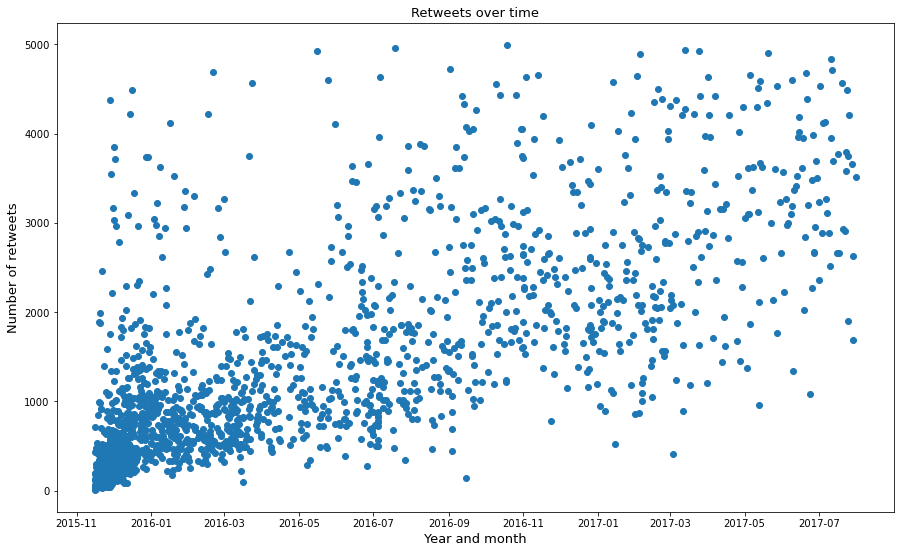

In [42]:
plt.subplots(figsize=(15, 9))
y = twitter_archive_master[twitter_archive_master.retweet_count <= 5000] # since 75% of the values are <= 2500
plt.scatter(y.tweet_timestamp, y.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');

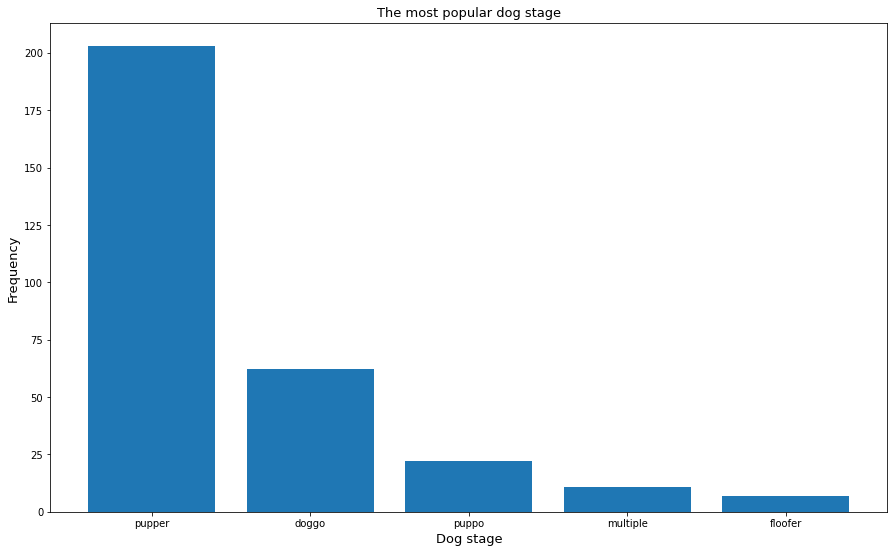

In [43]:
index = twitter_archive_master.dog_stage.value_counts().index[1:]
values = twitter_archive_master.dog_stage.value_counts().values[1:]

plt.subplots(figsize=(15, 9))
plt.bar(index,values)
plt.title('The most popular dog stage', color = 'black', fontsize = '13')
plt.xlabel('Dog stage', color = 'black', fontsize = '13')
plt.ylabel('Frequency', color = 'black', fontsize = '13');

In [44]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1930
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [45]:
twitter_archive_master.favorite_count.describe()

count      1968.000000
mean       7793.851626
std       11496.229337
min          66.000000
25%        1644.750000
50%        3509.000000
75%        9657.000000
max      146106.000000
Name: favorite_count, dtype: float64

### Insights:
1. The first scatter plot shows that WeRateDogs retweets are increasing gradually over the months.

2. The most popular dog stage is a "pupper".

3. The most used twitter source is Twitter for iPhone.

4. The median and mean favorite count is 3511 and 7796 respectively.